In [151]:
# load a pkl file from another directory
import pickle
import os
import csv
import pandas as pd

def load_pkl_file(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data


In [152]:
folder_path = 'My Drive/Final-project/'


In [153]:
# read in the dataframe of images paths and labels
df = pd.read_csv(folder_path + 'merged_image_data.csv')
df.head()

,image_path,label
0,./Normal/images/Normal-6196.png,Normal-6196.png
1,./Normal/images/Normal-7288.png,Normal-7288.png
2,./Normal/images/Normal-1821.png,Normal-1821.png
3,./Normal/images/Normal-4781.png,Normal-4781.png
4,./Normal/images/Normal-4959.png,Normal-4959.png


In [154]:
# identify any missing values
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [155]:
# First, remove the .png file extension, then split into four new columns.
df[['Classification Type', 'Picture No.']] = df['label']\
                                                            .str.replace('.png', '', regex=False)\
                                                            .str.split('-', expand=True)
df.tail()

,image_path,label,Classification Type,Picture No.
21160,./Viral_Pneumonia/images/Viral Pneumonia-972.png,Viral Pneumonia-972.png,Viral Pneumonia,972
21161,./Viral_Pneumonia/images/Viral Pneumonia-741.png,Viral Pneumonia-741.png,Viral Pneumonia,741
21162,./Viral_Pneumonia/images/Viral Pneumonia-999.png,Viral Pneumonia-999.png,Viral Pneumonia,999
21163,./Viral_Pneumonia/images/Viral Pneumonia-755.png,Viral Pneumonia-755.png,Viral Pneumonia,755
21164,./Viral_Pneumonia/images/Viral Pneumonia-769.png,Viral Pneumonia-769.png,Viral Pneumonia,769


In [156]:
# identify any missing values
df.isnull().sum()

image_path             0
label                  0
Classification Type    0
Picture No.            0
dtype: int64

In [157]:
# classification type counts
df['Classification Type'].value_counts()

Classification Type
Normal             10192
Lung_Opacity        6012
COVID               3616
Viral Pneumonia     1345
Name: count, dtype: int64

In [158]:
# add a column called Classification and if the Classification Type is Normal, then the Classification it is Normal, if it is not Normal, then it is Abnormal
df['Classification'] = df['Classification Type'].apply(lambda x: 'Normal' if x == 'Normal' else 'Abnormal')
df.head()

,image_path,label,Classification Type,Picture No.,Classification
0,./Normal/images/Normal-6196.png,Normal-6196.png,Normal,6196,Normal
1,./Normal/images/Normal-7288.png,Normal-7288.png,Normal,7288,Normal
2,./Normal/images/Normal-1821.png,Normal-1821.png,Normal,1821,Normal
3,./Normal/images/Normal-4781.png,Normal-4781.png,Normal,4781,Normal
4,./Normal/images/Normal-4959.png,Normal-4959.png,Normal,4959,Normal


In [159]:
# Start with the userid column
# Look at the value counts to decide which encoder to use
df['Classification'].value_counts()

Classification
Abnormal    10973
Normal      10192
Name: count, dtype: int64

Note: you may need to restart the kernel to use updated packages.


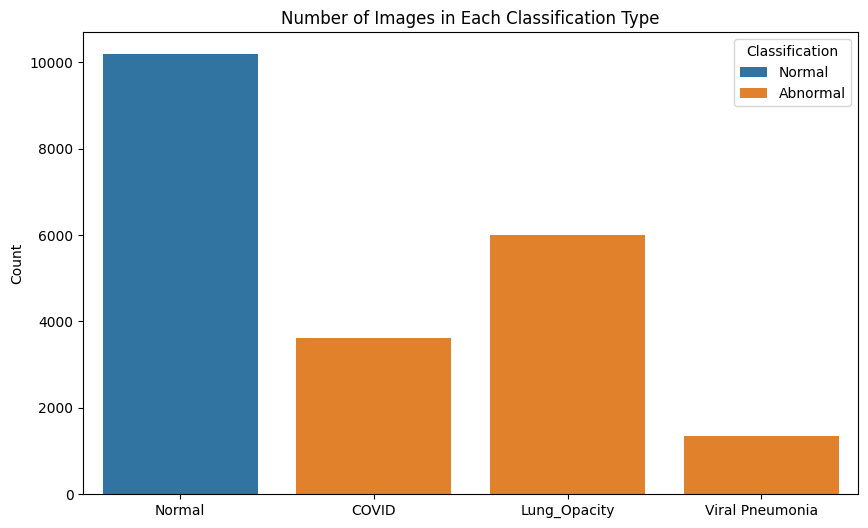

In [160]:
# create a graph showing the number of images in each classification type
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Classification Type', hue='Classification')
plt.title('Number of Images in Each Classification Type')
# label the y axis as Number
plt.ylabel('Count')
# remove the x axis label
plt.xlabel('')
plt.show()

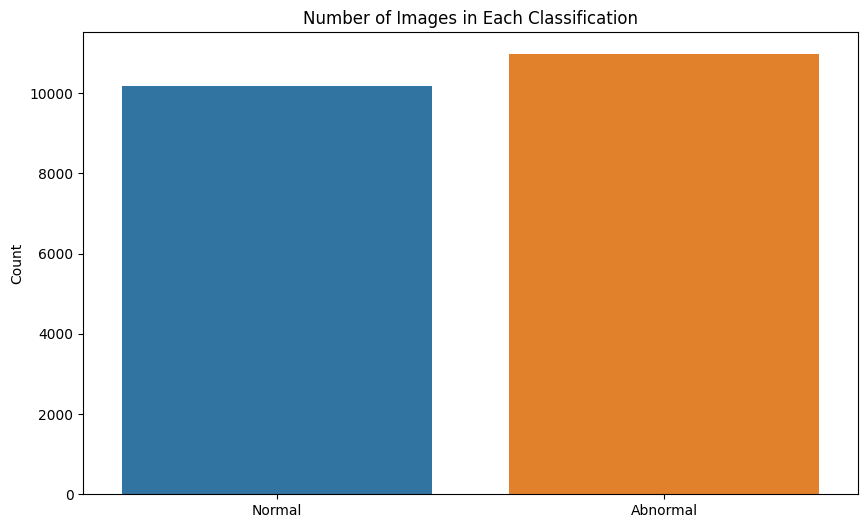

In [161]:
# create a graph showing the number of images in each classification
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Classification', hue='Classification')
plt.title('Number of Images in Each Classification')
# label the y axis as Number
plt.ylabel('Count')
# remove the x axis label
plt.xlabel('')
plt.show()

In [162]:
# Load the images from the img_preprocessed.pkl file
import pickle
import time

max_retries = 5
retry_delay = 5  # seconds

for attempt in range(max_retries):
    try:
        with open(folder_path + 'img_preprocessed32.pkl', 'rb') as file:
            normalized_images32 = pickle.load(file)
        break
    except TimeoutError:
        if attempt < max_retries - 1:
            print(f"Attempt {attempt + 1} failed. Retrying in {retry_delay} seconds...")
            time.sleep(retry_delay)
        else:
            print("Max retries reached. Could not load the file.")
            raise

normalized_images32[0]

array([[0.5254902 , 0.44705883, 0.44313726, ..., 0.5058824 , 0.53333336,
        0.57254905],
       [0.00784314, 0.        , 0.02352941, ..., 0.03529412, 0.04705882,
        0.02352941],
       [0.16078432, 0.16862746, 0.34901962, ..., 0.06666667, 0.06666667,
        0.05882353],
       ...,
       [0.4745098 , 0.75686276, 0.85882354, ..., 0.83137256, 0.7607843 ,
        0.54901963],
       [0.6431373 , 0.8392157 , 0.88235295, ..., 0.84705883, 0.8117647 ,
        0.63529414],
       [0.8117647 , 0.8666667 , 0.8901961 , ..., 0.84313726, 0.8235294 ,
        0.7529412 ]], dtype=float32)

In [163]:
# save normalized images as X
X = normalized_images32
import numpy as np

# Features (already normalized images)
X = np.array(X)  # Ensure X is a NumPy array

# Check dataset size
print(f"Total Images in X: {X.shape}")


Total Images in X: (21165, 32, 32)


In [164]:
# Expand dimensions to add a channel (grayscale images need 1 channel)
X = np.expand_dims(X, axis=-1)

# Confirm the new shape
print(f"Updated X shape: {X.shape}")  # Expected: (21165, 32, 32, 1)


Updated X shape: (21165, 32, 32, 1)


In [165]:
# Ensure y_classification_type is a NumPy array
y_classification_type = np.array(y_classification_type)

# Print shape and unique class labels
print(f"y_classification_type shape: {y_classification_type.shape}")  # Expected: (21165,)
print(f"Unique class labels: {np.unique(y_classification_type, return_counts=True)}")


y_classification_type shape: (21165,)
Unique class labels: (array(['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'], dtype=object), array([ 3616,  6012, 10192,  1345]))


In [166]:
# Get indices for each class
normal_indices = np.where(y_classification_type == "Normal")[0]
covid_indices = np.where(y_classification_type == "COVID")[0]
pneumonia_indices = np.where(y_classification_type == "Viral Pneumonia")[0]

# Print the number of images selected for augmentation
print(f"Normal images: {len(normal_indices)}")
print(f"COVID images: {len(covid_indices)}")
print(f"Viral Pneumonia images: {len(pneumonia_indices)}")


Normal images: 10192
COVID images: 3616
Viral Pneumonia images: 1345


In [167]:
# Extract images for each category
X_normal = X[normal_indices]
X_covid = X[covid_indices]
X_pneumonia = X[pneumonia_indices]

# Print the shapes to verify correctness
print(f"X_normal shape: {X_normal.shape}")  # Expected: (10192, 32, 32, 1)
print(f"X_covid shape: {X_covid.shape}")  # Expected: (3616, 32, 32, 1)
print(f"X_pneumonia shape: {X_pneumonia.shape}")  # Expected: (1345, 32, 32, 1)


X_normal shape: (10192, 32, 32, 1)
X_covid shape: (3616, 32, 32, 1)
X_pneumonia shape: (1345, 32, 32, 1)


In [168]:
import tensorflow as tf
import numpy as np

# Define augmentation transformations (ONLY Rotation)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.01)  # Rotate images by 1% (~3.6 degrees)
])

# Function to augment images while ensuring shape consistency
def augment_images(images, num_augmented):
    augmented_images = []
    
    print(f"Received images shape: {images.shape}")  # Debugging

    for img in images:
        print(f"Processing image with shape: {img.shape}")  # Debugging
        
        img = tf.expand_dims(img, axis=0)  # Add batch dimension (1, 32, 32, 1)
        print(f"Shape after expand_dims: {img.shape}")  # Debugging

        for _ in range(num_augmented):
            aug_img = data_augmentation(img)  # Apply augmentation
            print(f"Shape after augmentation: {aug_img.shape}")  # Debugging

            # ✅ Ensure we only remove batch dimension while keeping channel
            aug_img = tf.reshape(aug_img, (32, 32, 1))
            print(f"Shape after reshape: {aug_img.shape}")  # Debugging

            augmented_images.append(aug_img.numpy())  # Convert to NumPy

    return np.array(augmented_images, dtype=np.float32) if augmented_images else np.array([])



In [169]:
# Print shape of X_normal to check before augmentation
print(f"X_normal shape before augmentation: {X_normal.shape}")


X_normal shape before augmentation: (10192, 32, 32, 1)


In [170]:
# Print shape of X_normal
print(f"X_normal shape: {X_normal.shape}")  # Expected: (10192, 32, 32, 1)

# Print shape of a single image from X_normal
print(f"Single X_normal image shape: {X_normal[0].shape}")  # Expected: (32, 32, 1)


X_normal shape: (10192, 32, 32, 1)
Single X_normal image shape: (32, 32, 1)


In [171]:
# Check if all images in X_normal have the correct shape (32, 32, 1)
incorrect_shapes = [img.shape for img in X_normal if img.shape != (32, 32, 1)]

# Print the number of incorrectly shaped images
print(f"Number of incorrectly shaped images: {len(incorrect_shapes)}")

# If there are incorrect shapes, print a few examples
if len(incorrect_shapes) > 0:
    print(f"Incorrect shapes found: {incorrect_shapes[:5]}")  # Show first 5 incorrect shapes


Number of incorrectly shaped images: 0


In [172]:
X_normal_aug = augment_images(X_normal[:5], num_augmented=1)  # Test on first 5 images
print(f"Final X_normal_aug shape: {X_normal_aug.shape}")  # Expected: (5, 32, 32, 1)


Received images shape: (5, 32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Final X_normal_aug shape: (5, 32, 32, 1)


In [173]:
# Augment all Normal images
X_normal_aug = augment_images(X_normal, num_augmented=1)

# Validate final shape
print(f"Final X_normal_aug shape: {X_normal_aug.shape}")  # Expected: (10192, 32, 32, 1)


Received images shape: (10192, 32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape:

In [174]:
# Concatenate augmented Normal images with original dataset
X_augmented = np.concatenate([X, X_normal_aug])

# Generate corresponding labels for the augmented images
y_normal_aug = np.full(X_normal_aug.shape[0], "Normal")

# Concatenate labels
y_classification_type_aug = np.concatenate([y_classification_type, y_normal_aug])

# Validate final dataset size
print(f"Original dataset size: {X.shape[0]}")
print(f"New dataset size after Normal augmentation: {X_augmented.shape[0]}")


Original dataset size: 21165
New dataset size after Normal augmentation: 31357


In [175]:
# Augment COVID images (Double them: 1x augmentation)
X_covid_aug = augment_images(X_covid, num_augmented=1)

# Validate augmentation
print(f"Final X_covid_aug shape: {X_covid_aug.shape}")  # Expected: (3616, 32, 32, 1)


Received images shape: (3616, 32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: 

In [176]:
# Concatenate augmented COVID images with the existing dataset
X_augmented = np.concatenate([X_augmented, X_covid_aug])

# Generate corresponding labels for the augmented COVID images
y_covid_aug = np.full(X_covid_aug.shape[0], "COVID")

# Concatenate the new labels
y_classification_type_aug = np.concatenate([y_classification_type_aug, y_covid_aug])

# Validate the final dataset size
print(f"Updated dataset size after COVID augmentation: {X_augmented.shape[0]}")


Updated dataset size after COVID augmentation: 34973


In [ ]:
# Augment Viral Pneumonia images (5x augmentation)
X_pneumonia_aug = augment_images(X_pneumonia, num_augmented=4)

# Validate augmentation
print(f"Final X_pneumonia_aug shape: {X_pneumonia_aug.shape}")  # Expected: (5380, 32, 32, 1)


Received images shape: (1345, 32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Processing image with shape: (32, 32, 1)
Shape after expand_dims: (1, 32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape after reshape: (32, 32, 1)
Shape after augmentation: (1, 32, 32, 1)
Shape aft

In [178]:
# Concatenate augmented Viral Pneumonia images with the existing dataset
X_augmented = np.concatenate([X_augmented, X_pneumonia_aug])

# Generate corresponding labels for the augmented Viral Pneumonia images
y_pneumonia_aug = np.full(X_pneumonia_aug.shape[0], "Viral Pneumonia")

# Concatenate the new labels
y_classification_type_aug = np.concatenate([y_classification_type_aug, y_pneumonia_aug])

# Validate the final dataset size
print(f"Final dataset size after all augmentations: {X_augmented.shape[0]}")


Final dataset size after all augmentations: 40353


In [179]:
import collections

# Verify the number of images per class in the final dataset
final_class_distribution = collections.Counter(y_classification_type_aug)

# Print the final counts
print("Final dataset class distribution:")
for class_label, count in final_class_distribution.items():
    print(f"{class_label}: {count}")


Final dataset class distribution:
Normal: 20384
COVID: 7232
Lung_Opacity: 6012
Viral Pneumonia: 6725


In [180]:
import numpy as np

# Binary classification labels (Normal = 0, Abnormal = 1)
y_normal_abnormal = np.where(y_classification_type_aug == "Normal", 0, 1)

# Multi-class labels for Abnormal cases (-1 for Normal, 0 for COVID, 1 for Lung Opacity, 2 for Viral Pneumonia)
y_abnormal_subtype = np.full(y_classification_type_aug.shape[0], -1)  # Default -1 for Normal
y_abnormal_subtype[y_classification_type_aug == "COVID"] = 0
y_abnormal_subtype[y_classification_type_aug == "Lung_Opacity"] = 1
y_abnormal_subtype[y_classification_type_aug == "Viral Pneumonia"] = 2

# Print label counts
print(f"Binary Classification (Normal/Abnormal) Counts: {np.unique(y_normal_abnormal, return_counts=True)}")
print(f"Abnormal Subtypes Counts: {np.unique(y_abnormal_subtype, return_counts=True)}")


Binary Classification (Normal/Abnormal) Counts: (array([0, 1]), array([20384, 19969]))
Abnormal Subtypes Counts: (array([-1,  0,  1,  2]), array([20384,  7232,  6012,  6725]))


In [181]:
from sklearn.model_selection import train_test_split

# Perform the train-test split with all labels aligned
X_train, X_test, y_train_normal_abnormal, y_test_normal_abnormal, y_train_abnormal_subtype, y_test_abnormal_subtype = train_test_split(
    X_augmented, y_normal_abnormal, y_abnormal_subtype, test_size=0.2, random_state=42, stratify=y_normal_abnormal
)

# Print dataset sizes to confirm correctness
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training Normal/Abnormal labels: {np.unique(y_train_normal_abnormal, return_counts=True)}")
print(f"Testing Normal/Abnormal labels: {np.unique(y_test_normal_abnormal, return_counts=True)}")
print(f"Training Abnormal Subtypes: {np.unique(y_train_abnormal_subtype, return_counts=True)}")
print(f"Testing Abnormal Subtypes: {np.unique(y_test_abnormal_subtype, return_counts=True)}")


Training set size: 32282
Testing set size: 8071
Training Normal/Abnormal labels: (array([0, 1]), array([16307, 15975]))
Testing Normal/Abnormal labels: (array([0, 1]), array([4077, 3994]))
Training Abnormal Subtypes: (array([-1,  0,  1,  2]), array([16307,  5752,  4895,  5328]))
Testing Abnormal Subtypes: (array([-1,  0,  1,  2]), array([4077, 1480, 1117, 1397]))


In [183]:
import tensorflow as tf
from keras import layers, models

# Define input shape for grayscale images (32x32, 1 channel)
input_shape = (32, 32, 1)

# Input layer
inputs = tf.keras.Input(shape=input_shape)  # Input layer accepting 32x32 grayscale images

# Shared CNN layers for feature extraction
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)  # Conv layer with 32 filters
x = layers.MaxPooling2D((2, 2))(x)  # Max pooling to reduce spatial dimensions

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # Conv layer with 64 filters
x = layers.MaxPooling2D((2, 2))(x)  # Max pooling

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)  # Conv layer with 128 filters
x = layers.MaxPooling2D((2, 2))(x)  # Max pooling

x = layers.Flatten()(x)  # Flatten the feature maps into a vector
x = layers.Dense(128, activation='relu')(x)  # Fully connected layer with 128 neurons

# **First Branch: Binary Classification (Normal vs. Abnormal)**
binary_output = layers.Dense(1, activation='sigmoid', name="binary_output")(x)  
# Output: Sigmoid activation (0 = Normal, 1 = Abnormal)

# **Second Branch: Multi-class Classification (Only for Abnormal cases)**
multi_class_hidden = layers.Dense(64, activation='relu')(x)  # Additional dense layer
multi_class_output = layers.Dense(3, activation='softmax', name="multi_class_output")(multi_class_hidden)  
# Output: Softmax activation for 3 classes (COVID, Lung Opacity, Viral Pneumonia)

# **Define the model with two outputs**
model = tf.keras.Model(inputs=inputs, outputs=[binary_output, multi_class_output])

# **Compile the model**
model.compile(optimizer='adam',
              loss={'binary_output': 'binary_crossentropy',  # Loss for binary classification
                    'multi_class_output': 'sparse_categorical_crossentropy'},  # Loss for multi-class classification
              metrics={'binary_output': 'accuracy',  # Track accuracy for binary classification
                       'multi_class_output': 'accuracy'})  # Track accuracy for multi-class classification

# Print the model summary
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        320 │ input_layer_13[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 128) │     73,856 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 128) │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2048)      │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    262,272 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ binary_output       │ (None, 1)         │        129 │ dense[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_class_output  │ (None, 3)         │        195 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 363,524 (1.39 MB)

 Trainable params: 363,524 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [185]:
import numpy as np

# Convert -1 labels to NaN (TensorFlow ignores NaN in loss calculations)
y_train_abnormal_subtype_masked = np.where(y_train_abnormal_subtype == -1, np.nan, y_train_abnormal_subtype)

# Train the model with masked labels
history = model.fit(
    X_train, 
    {'binary_output': y_train_normal_abnormal, 'multi_class_output': y_train_abnormal_subtype_masked},  
    epochs=10,  
    batch_size=32,  
    validation_split=0.2  
)




Epoch 1/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - binary_output_accuracy: 0.7613 - binary_output_loss: 0.4799 - loss: 0.9487 - multi_class_output_accuracy: 0.3361 - multi_class_output_loss: 0.4687 - val_binary_output_accuracy: 0.8386 - val_binary_output_loss: 0.3708 - val_loss: 0.8422 - val_multi_class_output_accuracy: 0.3475 - val_multi_class_output_loss: 0.4712
Epoch 2/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - binary_output_accuracy: 0.8463 - binary_output_loss: 0.3502 - loss: 0.6358 - multi_class_output_accuracy: 0.4059 - multi_class_output_loss: 0.2856 - val_binary_output_accuracy: 0.8665 - val_binary_output_loss: 0.3083 - val_loss: 0.5486 - val_multi_class_output_accuracy: 0.4206 - val_multi_class_output_loss: 0.2402
Epoch 3/10
808/808 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - binary_output_accuracy: 0.8892 - binary_output_loss: 0.2685 - loss: 0.4804 - multi_class_output_accuracy: 0.4292 - multi_class_output_loss: 0.2119 - val_binary_output_accuracy: 0.8919 - val_binary_out

In [186]:
# evaluate the model
import numpy as np

# Convert -1 labels to NaN for multi-class evaluation
y_test_abnormal_subtype_masked = np.where(y_test_abnormal_subtype == -1, np.nan, y_test_abnormal_subtype)

# Evaluate the model on the test set
test_loss, binary_loss, multi_class_loss, binary_acc, multi_class_acc = model.evaluate(
    X_test, 
    {'binary_output': y_test_normal_abnormal, 'multi_class_output': y_test_abnormal_subtype_masked}
)

# Print the results
print(f"Test Binary Classification Accuracy (Normal vs. Abnormal): {binary_acc:.4f}")
print(f"Test Multi-Class Classification Accuracy (COVID, Lung Opacity, Viral Pneumonia): {multi_class_acc:.4f}")


253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - binary_output_accuracy: 0.9402 - binary_output_loss: 0.1696 - loss: 0.3231 - multi_class_output_accuracy: 0.4574 - multi_class_output_loss: 0.1535
Test Binary Classification Accuracy (Normal vs. Abnormal): 0.9387
Test Multi-Class Classification Accuracy (COVID, Lung Opacity, Viral Pneumonia): 0.4569
